In [1]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

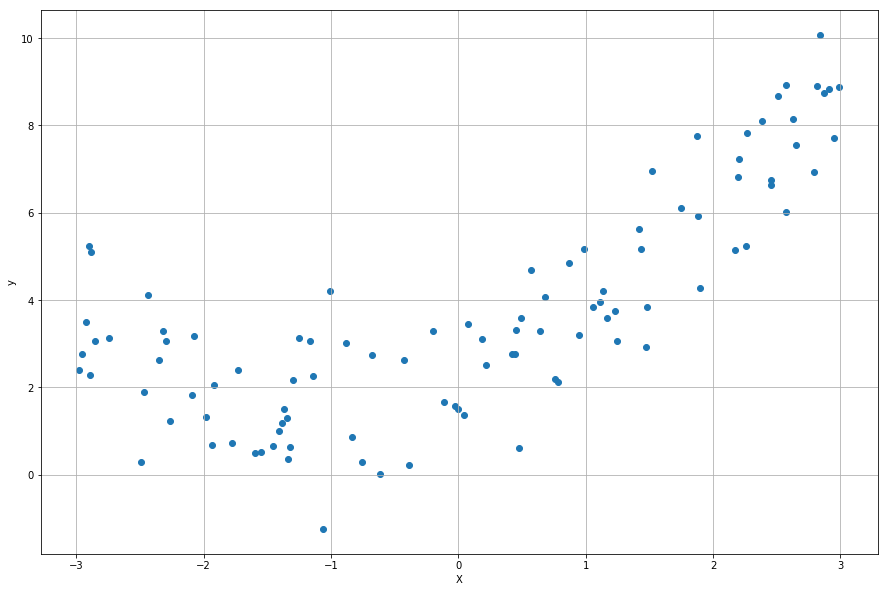

In [3]:
plt.figure(figsize=(15, 10))
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X, y)
plt.grid(True)
plt.show()

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[2.45531194]
[2.45531194 6.02855672]


In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.16070869]), array([[1.00369398, 0.45402615]]))

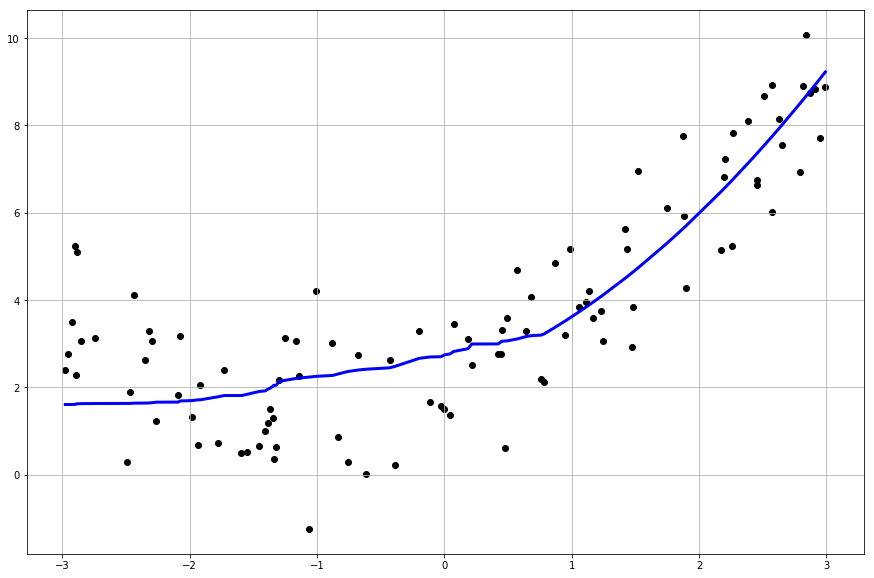

In [7]:
x_test = np.linspace(-3, 3, 100)
lin_preds = lin_reg.predict(X_poly)

target = np.c_[X_poly[:,0], lin_preds]
n_target = np.sort(target, axis=0)

plt.figure(figsize=(15, 10))
plt.scatter(X, y, color='black')
plt.plot(n_target[:,0], n_target[:,1], color='blue', linewidth=3)
plt.grid(True)
plt.show()

# 학습 곡선

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.figure(figsize=(15, 10))
    plt.ylim(0, 10)
    plt.plot(np.sqrt(train_errors), "r-+ ", linewidth=2, label='train set')
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label='val set')

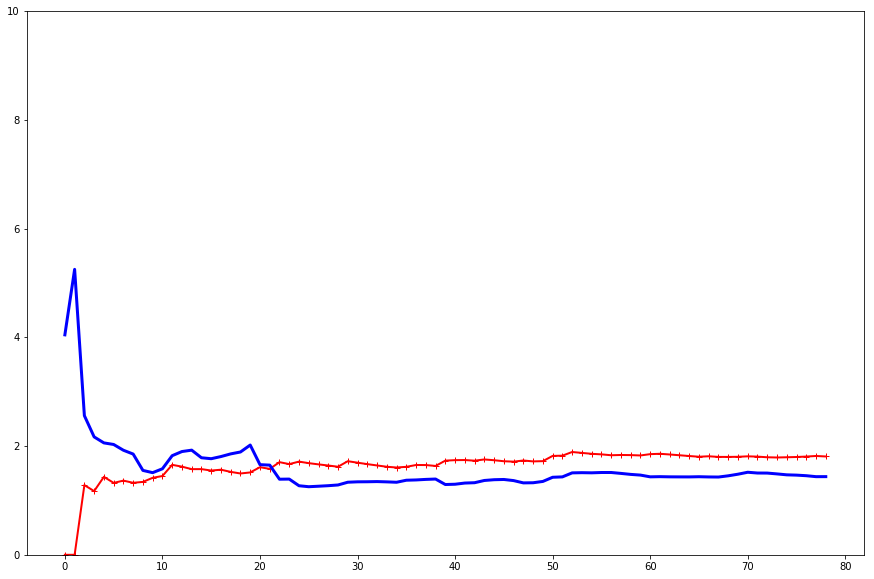

In [9]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

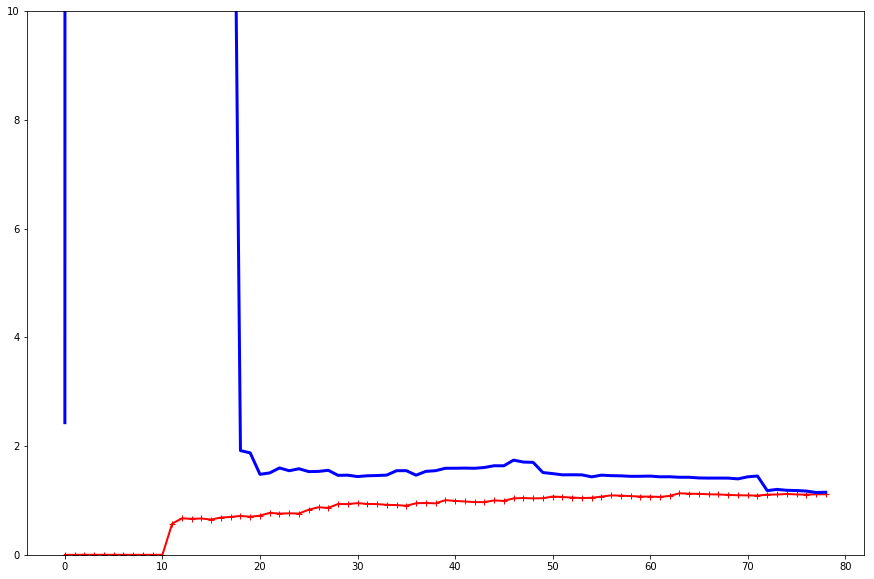

In [10]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

# Regularization

## Ridge

In [11]:
from sklearn.linear_model import Ridge, SGDRegressor
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[5.21445854]])

In [12]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.30036873])

## Lasso

In [13]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.17537927])

In [14]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.35713683])

## Elastic Net

In [15]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.17546425])